In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Get a summary of the numerical columns
df.describe().astype(int)

Shape of the dataset: (200, 5)

Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


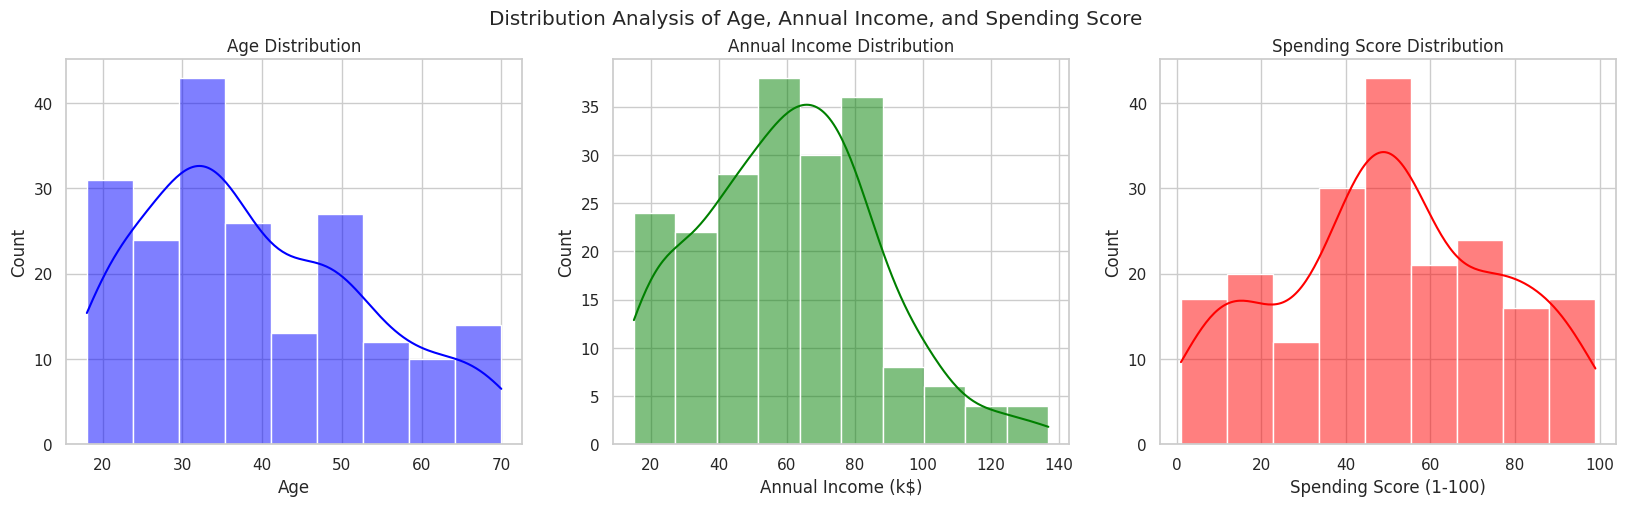

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

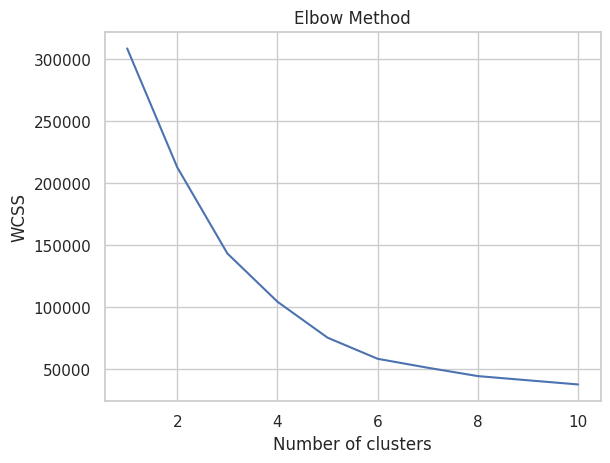

In [ ]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Create the KMeans model with the optimal number of clusters (assumed to be 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


In [ ]:
# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,40,87,17
4,25,26,78


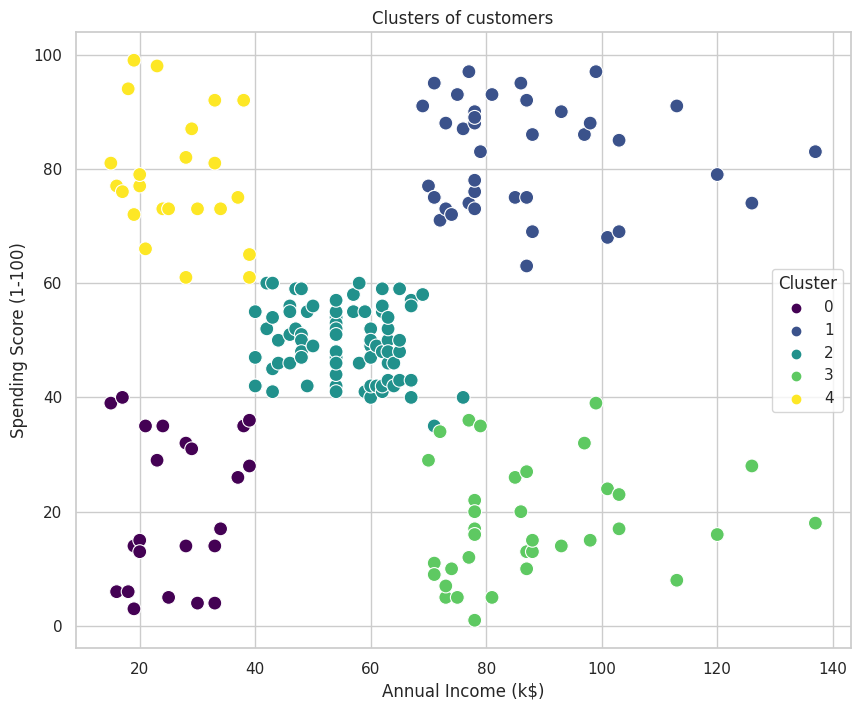

In [ ]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers')

# Display the plot
plt.show()

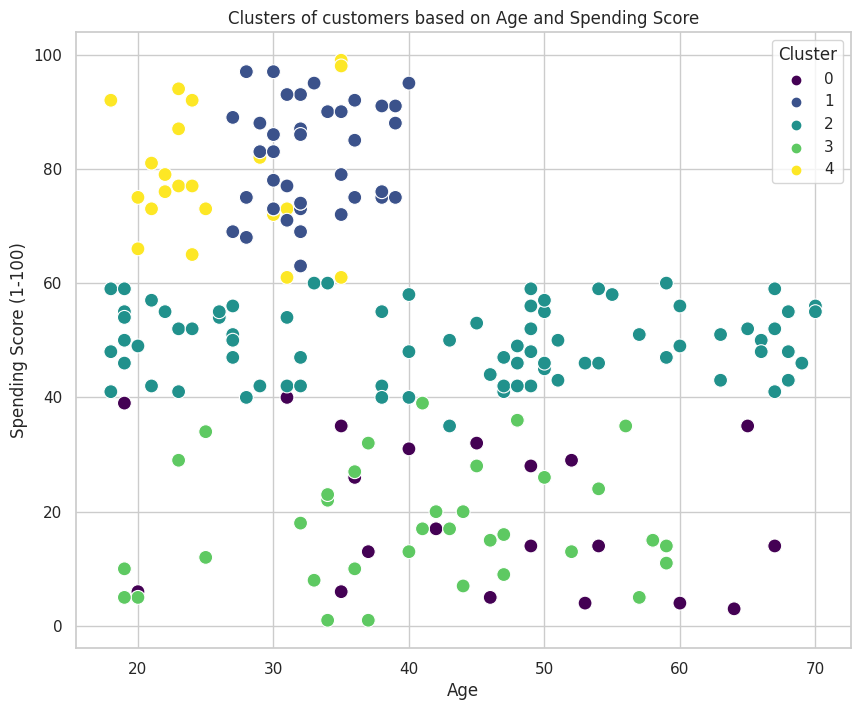

In [ ]:
# Create a scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

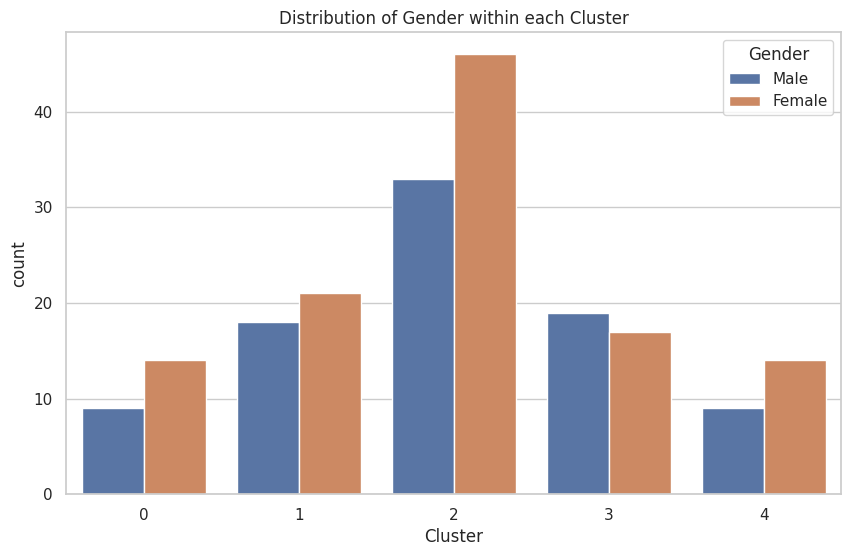

In [ ]:
# Create a count plot to show the distribution of 'Gender' within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

# Add a title to the plot
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

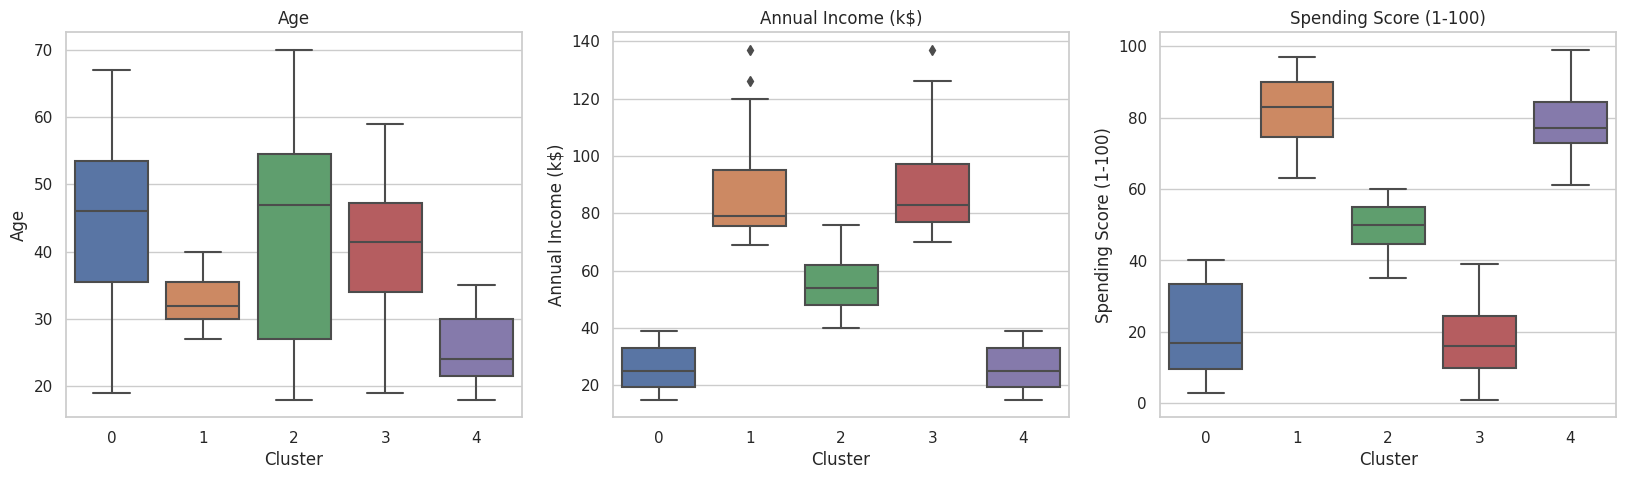

In [ ]:
# Create a boxplot for each feature split by 'Cluster'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot for 'Age'
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

# Display the plots
plt.show()

In [ ]:
# Create the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


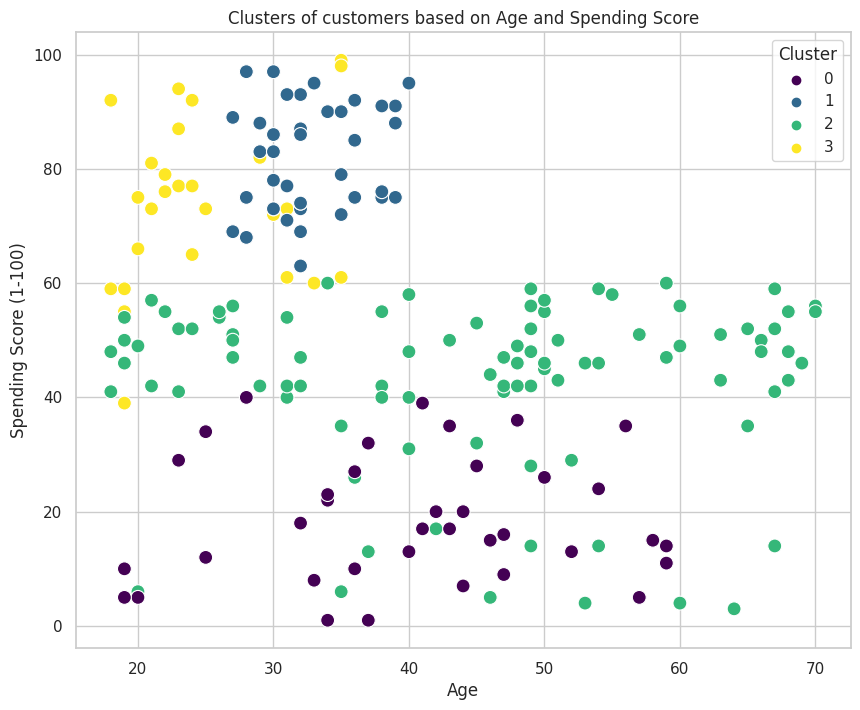

In [ ]:
# Create a scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

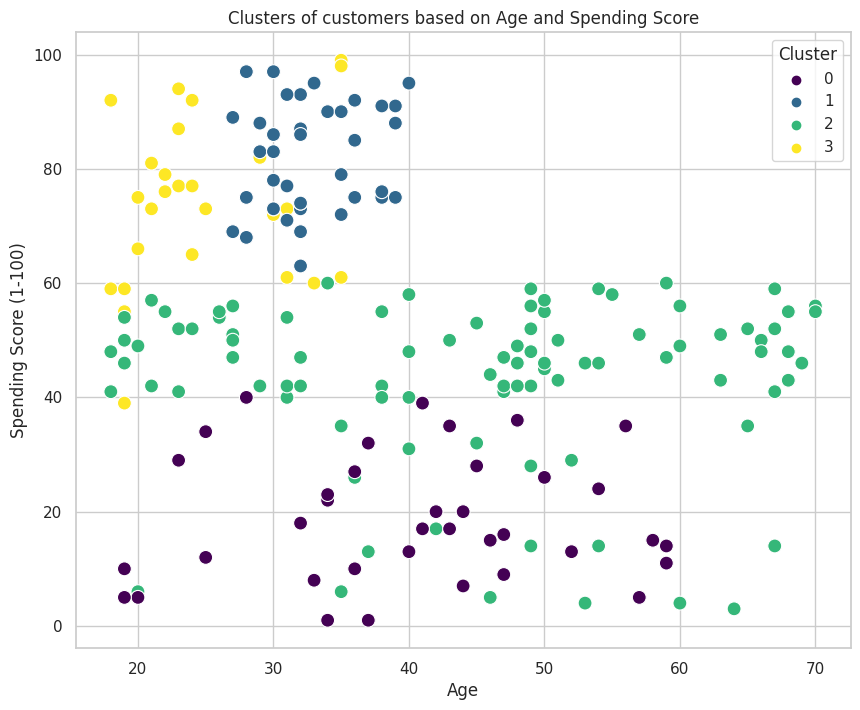

In [ ]:
# Create a scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

In [ ]:
# Create the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


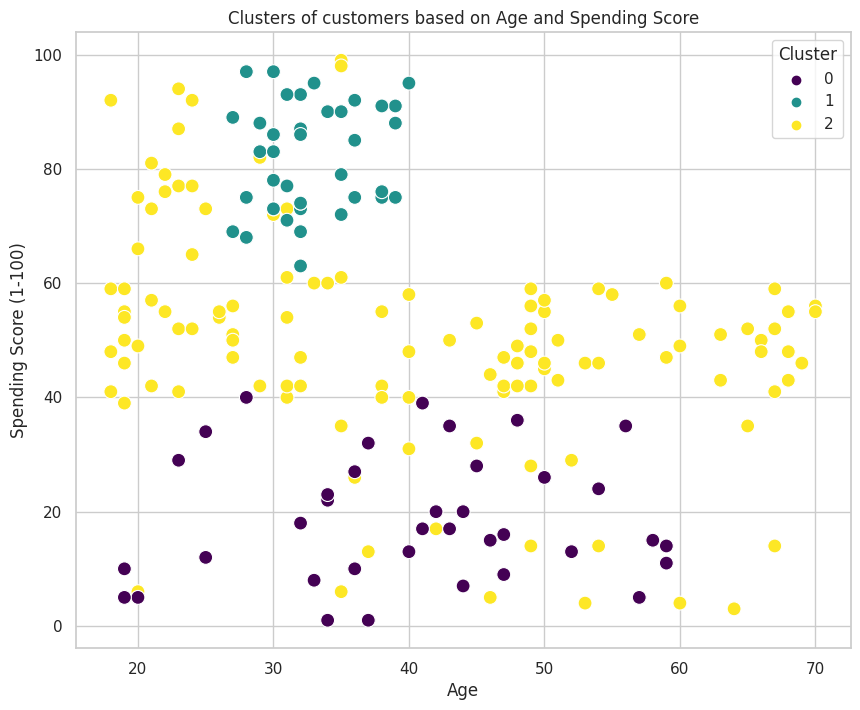

In [ ]:
# Create a scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

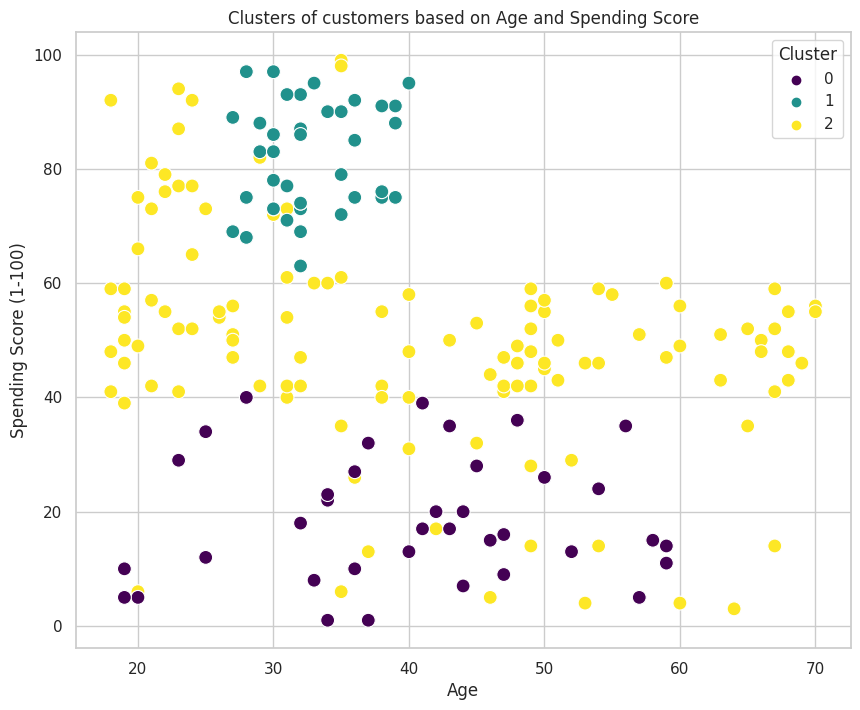

In [ ]:
# Create a scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()